In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
from datetime import datetime

# Bring in the file and drop all the empty columns

In [2]:
raw_data = pd.read_csv("../data/Smileon.2021.10.17.csv", header=2)
raw_data.dropna(how='all', axis=1, inplace=True)
raw_data

C:\Users\auward\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (2,32,36,53,58,59,77,83,89,93,105,127,141,144) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,CityName,CountyName,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
0,93115324,SMILE ON 60+ Registration,NaN,9/30/2021 16:56,9/30/2021 16:57,1,3638169,123747,Smyrna,Rutherford,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93115188,SMILE ON 60+ Registration,NaN,9/30/2021 16:53,9/30/2021 16:53,0,4431194,123747,Nashville,Davidson,...,NaN,NaN,NaN,Referral Follow-Up,NaN,NaN,NaN,NaN,NaN,NaN
2,93115081,SMILE ON 60+ Clinical,NaN,9/30/2021 16:50,9/30/2021 16:51,1,2941341,161979,Memphis,Shelby,...,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,No,Yes,No,NaN,NaN
3,93115032,SMILE ON 60+ Clinical,NaN,9/30/2021 16:48,9/30/2021 16:49,1,3823933,161979,Memphis,Shelby,...,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,No,Yes,No,NaN,NaN
4,93114968,SMILE ON 60+ Clinical,NaN,9/30/2021 16:46,9/30/2021 16:48,2,3348256,161979,Memphis,Shelby,...,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,No,Yes,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57855,55627514,SMILE ON 60+ Clinical,NaN,8/1/2018 8:00,8/1/2018 8:08,8,2385621,118821,Lascassas,Rutherford,...,NaN,NaN,Interfaith Dental Clinic - Murfreesboro,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57856,67251452,SMILE ON 60+ Clinical,NaN,5/31/2018 8:27,5/31/2018 8:29,2,2631417,131347,Kingsport,Sullivan,...,NaN,NaN,Friends in Need Health Center - Kingsport,Provider Site,Not available,No,No,Yes,NaN,NaN
57857,53192452,SMILE ON 60+ Registration,NaN,5/23/2018 14:11,5/23/2018 14:11,0,-1,60132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57858,67915561,SMILE ON 60+ Registration,NaN,5/15/2018 9:06,5/15/2018 9:10,4,3239813,128174,Memphis,Shelby,...,NaN,NaN,Church Health Center - Memphis,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN


#### Get rid of the extra parts of the column titles

In [3]:
raw_data.columns = [col.replace("SMILE ON 60+ ", "") for col in raw_data.columns]
raw_data.columns = [re.sub("\w+ - ", "", col) for col in raw_data.columns]
raw_data.head(50)

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,CityName,CountyName,...,Treatment Urgency,Untreated Decay,Site Enroller ID,Site Enroller Location,Treatment Action: Upload After Picture on Finish Tab,Treatment Is the treatment plan completed?,Treatment Was a treatment plan developed?,"Treatment Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",Verification of Transportation Arranged,Verification of Verification of Eligibility
0,93115324,SMILE ON 60+ Registration,NaN,9/30/2021 16:56,9/30/2021 16:57,1,3638169,123747,Smyrna,Rutherford,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93115188,SMILE ON 60+ Registration,NaN,9/30/2021 16:53,9/30/2021 16:53,0,4431194,123747,Nashville,Davidson,...,NaN,NaN,NaN,Referral Follow-Up,NaN,NaN,NaN,NaN,NaN,NaN
2,93115081,SMILE ON 60+ Clinical,NaN,9/30/2021 16:50,9/30/2021 16:51,1,2941341,161979,Memphis,Shelby,...,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,No,Yes,No,NaN,NaN
3,93115032,SMILE ON 60+ Clinical,NaN,9/30/2021 16:48,9/30/2021 16:49,1,3823933,161979,Memphis,Shelby,...,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,No,Yes,No,NaN,NaN
4,93114968,SMILE ON 60+ Clinical,NaN,9/30/2021 16:46,9/30/2021 16:48,2,3348256,161979,Memphis,Shelby,...,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,No,Yes,No,NaN,NaN
5,93114880,SMILE ON 60+ Registration,NaN,9/30/2021 16:44,9/30/2021 16:45,1,4403427,123747,Murfreesboro,Rutherford,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,93114808,SMILE ON 60+ Registration,NaN,9/30/2021 16:43,9/30/2021 16:43,0,4393691,123747,Murfreesboro,Rutherford,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,93114741,SMILE ON 60+ Registration,NaN,9/30/2021 16:41,9/30/2021 16:42,1,4473621,123747,Brentwood,Williamson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,93114520,SMILE ON 60+ Clinical,NaN,9/30/2021 16:35,9/30/2021 16:37,2,4492947,133280,Millington,Shelby,...,NaN,NaN,Christ Community Health Services- Raleigh,Provider Site,NaN,No,Yes,No,NaN,Yes
9,93154018,SMILE ON 60+ Clinical,NaN,9/30/2021 16:09,9/30/2021 16:12,3,2887352,133205,Memphis,Shelby,...,No obvious problem,No,Christ Community Health Services- Broad Avenue,Provider Site,NaN,Yes,Yes,Yes,NaN,NaN


#### Is the number of unique callernums equal to the length of the dataframe?

In [4]:
uniq_callernum_bool = raw_data.CallerNum.nunique()==len(raw_data)
uniq_callernum_bool

False

#### Make a list of all the unique CallerNums

In [5]:
uniq_callernum = raw_data.CallerNum.unique()
uniq_callernum = uniq_callernum.tolist()
print(len(uniq_callernum))
print(type(uniq_callernum))
uniq_callernum

10711
<class 'list'>


[3638169,
 4431194,
 2941341,
 3823933,
 3348256,
 4403427,
 4393691,
 4473621,
 4492947,
 2887352,
 2686768,
 4232362,
 4022760,
 2826884,
 4298208,
 3746741,
 4032888,
 4212974,
 4558221,
 2750607,
 3797067,
 4558147,
 3756941,
 2995418,
 2957321,
 4388948,
 2741897,
 4510473,
 3964791,
 2921569,
 3533392,
 4324969,
 4543180,
 4415411,
 3158941,
 4054515,
 4362600,
 4374028,
 4098810,
 4337053,
 4379765,
 4323507,
 4557250,
 4557151,
 4559691,
 4380633,
 4557010,
 4152548,
 4336930,
 4398511,
 4399615,
 4557017,
 4401944,
 4556939,
 4410364,
 2819657,
 4413813,
 2479014,
 4417792,
 2490599,
 4239168,
 4569794,
 4422838,
 4547665,
 4569681,
 2535463,
 3740018,
 4374170,
 3542035,
 4540652,
 3116077,
 3194031,
 2860779,
 2458661,
 4553746,
 4115217,
 4568831,
 2941402,
 4288931,
 4241154,
 3115475,
 4466387,
 4436871,
 2451772,
 3601128,
 4541680,
 4302601,
 3236540,
 2795781,
 4278790,
 2807333,
 3944395,
 4554278,
 2682209,
 4306353,
 3922579,
 2456640,
 2846396,
 4468174,
 3027564,


#### Get make a dictionary of all the dates each CallerNum ID called in.

In [6]:
callernum_dates = {}

for id in uniq_callernum:
    boo_1 = raw_data["CallerNum"] == id
    df = raw_data.loc[boo_1]
#     print(df)
    date = list(df["CallDateAndTimeStart"])
    callernum_dates[id] = date
print("done")
callernum_dates

done


{3638169: ['9/30/2021 16:56',
  '9/29/2021 15:40',
  '9/24/2021 13:13',
  '9/23/2021 13:58',
  '7/22/2021 7:58',
  '7/21/2021 7:33',
  '12/16/2020 10:02',
  '12/14/2020 13:34',
  '9/24/2020 16:26',
  '8/18/2020 16:25',
  '8/4/2020 16:18',
  '8/4/2020 15:20'],
 4431194: ['9/30/2021 16:53',
  '9/27/2021 16:26',
  '9/13/2021 16:29',
  '8/5/2021 14:14'],
 2941341: ['9/30/2021 16:50',
  '3/31/2021 7:36',
  '10/15/2020 15:03',
  '9/22/2020 13:49',
  '10/8/2019 15:35',
  '10/8/2019 15:28'],
 3823933: ['9/30/2021 16:48',
  '8/19/2021 14:22',
  '7/23/2021 10:44',
  '6/29/2021 16:39',
  '6/21/2021 15:29',
  '11/10/2020 9:56',
  '11/10/2020 9:40',
  '7/2/2020 16:28'],
 3348256: ['9/30/2021 16:46',
  '9/10/2021 13:30',
  '7/15/2021 8:00',
  '5/7/2021 7:58',
  '5/3/2021 16:46',
  '4/8/2021 16:48',
  '1/5/2021 16:31',
  '4/15/2020 16:19',
  '4/15/2020 16:10'],
 4403427: ['9/30/2021 16:44',
  '9/15/2021 13:04',
  '8/18/2021 15:10',
  '7/23/2021 11:19'],
 4393691: ['9/30/2021 16:43',
  '9/30/2021 15:2

In [7]:
list1 = list(callernum_dates.keys())
list2 = list(callernum_dates.values())
id_dates_tuples = list(zip(list1,list2))
print(type(id_dates_tuples))
id_dates = pd.DataFrame(id_dates_tuples, columns = ["CallerNum", "CallsList"])
print(type(id_dates))
id_dates    

<class 'list'>
<class 'pandas.core.frame.DataFrame'>


,CallerNum,CallsList
0,3638169,"[9/30/2021 16:56, 9/29/2021 15:40, 9/24/2021 1..."
1,4431194,"[9/30/2021 16:53, 9/27/2021 16:26, 9/13/2021 1..."
2,2941341,"[9/30/2021 16:50, 3/31/2021 7:36, 10/15/2020 1..."
3,3823933,"[9/30/2021 16:48, 8/19/2021 14:22, 7/23/2021 1..."
4,3348256,"[9/30/2021 16:46, 9/10/2021 13:30, 7/15/2021 8..."
...,...,...
10706,2385100,[8/1/2018 11:26]
10707,2385088,[8/1/2018 11:19]
10708,2385054,[8/1/2018 11:08]
10709,2385074,[8/1/2018 10:48]


#### Create dictionary of IDs and count of dates

In [8]:
callernum_date_ct = {}
for id in uniq_callernum:
    boo_1 = raw_data["CallerNum"] == id
    df = raw_data.loc[boo_1]
#     print(df)
    count = len(list(df["CallDateAndTimeStart"]))
    callernum_date_ct[id] = count
print("done")
callernum_date_ct

done


{3638169: 12,
 4431194: 4,
 2941341: 6,
 3823933: 8,
 3348256: 9,
 4403427: 4,
 4393691: 4,
 4473621: 3,
 4492947: 3,
 2887352: 6,
 2686768: 10,
 4232362: 5,
 4022760: 5,
 2826884: 14,
 4298208: 6,
 3746741: 15,
 4032888: 5,
 4212974: 4,
 4558221: 1,
 2750607: 9,
 3797067: 5,
 4558147: 1,
 3756941: 5,
 2995418: 16,
 2957321: 17,
 4388948: 4,
 2741897: 24,
 4510473: 4,
 3964791: 10,
 2921569: 9,
 3533392: 6,
 4324969: 5,
 4543180: 2,
 4415411: 5,
 3158941: 14,
 4054515: 10,
 4362600: 4,
 4374028: 3,
 4098810: 8,
 4337053: 7,
 4379765: 3,
 4323507: 7,
 4557250: 1,
 4557151: 1,
 4559691: 2,
 4380633: 2,
 4557010: 1,
 4152548: 7,
 4336930: 3,
 4398511: 2,
 4399615: 2,
 4557017: 1,
 4401944: 2,
 4556939: 1,
 4410364: 2,
 2819657: 14,
 4413813: 2,
 2479014: 3,
 4417792: 2,
 2490599: 13,
 4239168: 6,
 4569794: 2,
 4422838: 3,
 4547665: 2,
 4569681: 2,
 2535463: 14,
 3740018: 6,
 4374170: 5,
 3542035: 26,
 4540652: 3,
 3116077: 7,
 3194031: 9,
 2860779: 28,
 2458661: 11,
 4553746: 2,
 4115217:

#### Make a third column in the dataframe for the count of dates

In [9]:
master = id_dates

def add_calnum_ct(row):
    return callernum_date_ct[row["CallerNum"]]

master.apply (lambda row: add_calnum_ct(row), axis=1)

master['NumOfCalls'] = master.apply (lambda row: add_calnum_ct(row), axis=1)
master.head(20) 

,CallerNum,CallsList,NumOfCalls
0,3638169,"[9/30/2021 16:56, 9/29/2021 15:40, 9/24/2021 1...",12
1,4431194,"[9/30/2021 16:53, 9/27/2021 16:26, 9/13/2021 1...",4
2,2941341,"[9/30/2021 16:50, 3/31/2021 7:36, 10/15/2020 1...",6
3,3823933,"[9/30/2021 16:48, 8/19/2021 14:22, 7/23/2021 1...",8
4,3348256,"[9/30/2021 16:46, 9/10/2021 13:30, 7/15/2021 8...",9
5,4403427,"[9/30/2021 16:44, 9/15/2021 13:04, 8/18/2021 1...",4
6,4393691,"[9/30/2021 16:43, 9/30/2021 15:24, 9/16/2021 1...",4
7,4473621,"[9/30/2021 16:41, 9/27/2021 15:31, 8/25/2021 1...",3
8,4492947,"[9/30/2021 16:35, 9/2/2021 15:33, 9/2/2021 10:38]",3
9,2887352,"[9/30/2021 16:09, 9/28/2020 15:56, 3/12/2020 9...",6


#### Max and Min does not work on dates. Max is the most recent, min is the oldest. These are strings in this format.

In [10]:
callernum2826884 = callernum_dates[2826884]
# max_test = max(callernum_dates[2826884]) # Latest date in this list is 9/30/2021, earliest is 8/1/2019
# max_test # this pulls 9/7/2021
# min_test = min(callernum_dates[2826884]) 
# min_test # pulls 1/27/2021
# test_answer = max_test - min_test
# test_answer # error because they are strings


In [11]:
id_dates

,CallerNum,CallsList,NumOfCalls
0,3638169,"[9/30/2021 16:56, 9/29/2021 15:40, 9/24/2021 1...",12
1,4431194,"[9/30/2021 16:53, 9/27/2021 16:26, 9/13/2021 1...",4
2,2941341,"[9/30/2021 16:50, 3/31/2021 7:36, 10/15/2020 1...",6
3,3823933,"[9/30/2021 16:48, 8/19/2021 14:22, 7/23/2021 1...",8
4,3348256,"[9/30/2021 16:46, 9/10/2021 13:30, 7/15/2021 8...",9
...,...,...,...
10706,2385100,[8/1/2018 11:26],1
10707,2385088,[8/1/2018 11:19],1
10708,2385054,[8/1/2018 11:08],1
10709,2385074,[8/1/2018 10:48],1


#### Get the score for Was Treatment Plan Completed

#### Vacuum the total number of "yes" from Treatment Plan Completed per callernum

In [12]:
master = id_dates

def add_tpc_score(row):
    if row['Treatment Is the treatment plan completed?'] == "Yes":
        return 1
    if row['Treatment Is the treatment plan completed?'] != "Yes":
        return 0

# master.apply (lambda row: add_tpc_score(row), axis=1)
    
raw_data["TPC_Score"] = raw_data.apply (lambda row: add_tpc_score(row), axis=1)
master.head(50)

,CallerNum,CallsList,NumOfCalls
0,3638169,"[9/30/2021 16:56, 9/29/2021 15:40, 9/24/2021 1...",12
1,4431194,"[9/30/2021 16:53, 9/27/2021 16:26, 9/13/2021 1...",4
2,2941341,"[9/30/2021 16:50, 3/31/2021 7:36, 10/15/2020 1...",6
3,3823933,"[9/30/2021 16:48, 8/19/2021 14:22, 7/23/2021 1...",8
4,3348256,"[9/30/2021 16:46, 9/10/2021 13:30, 7/15/2021 8...",9
5,4403427,"[9/30/2021 16:44, 9/15/2021 13:04, 8/18/2021 1...",4
6,4393691,"[9/30/2021 16:43, 9/30/2021 15:24, 9/16/2021 1...",4
7,4473621,"[9/30/2021 16:41, 9/27/2021 15:31, 8/25/2021 1...",3
8,4492947,"[9/30/2021 16:35, 9/2/2021 15:33, 9/2/2021 10:38]",3
9,2887352,"[9/30/2021 16:09, 9/28/2020 15:56, 3/12/2020 9...",6


In [13]:
tpc_yes = {}
for id in uniq_callernum:
    boo_1 = raw_data["CallerNum"] == id
    df = raw_data.loc[boo_1]
#     print(df)
    yesses = df["TPC_Score"].sum()
    tpc_yes[id] = yesses
print("done")
tpc_yes

done


{3638169: 0,
 4431194: 0,
 2941341: 1,
 3823933: 2,
 3348256: 3,
 4403427: 0,
 4393691: 0,
 4473621: 0,
 4492947: 0,
 2887352: 2,
 2686768: 0,
 4232362: 0,
 4022760: 0,
 2826884: 0,
 4298208: 0,
 3746741: 0,
 4032888: 0,
 4212974: 0,
 4558221: 0,
 2750607: 4,
 3797067: 0,
 4558147: 0,
 3756941: 4,
 2995418: 3,
 2957321: 4,
 4388948: 0,
 2741897: 0,
 4510473: 0,
 3964791: 1,
 2921569: 4,
 3533392: 0,
 4324969: 1,
 4543180: 0,
 4415411: 0,
 3158941: 3,
 4054515: 2,
 4362600: 0,
 4374028: 0,
 4098810: 0,
 4337053: 0,
 4379765: 0,
 4323507: 0,
 4557250: 0,
 4557151: 0,
 4559691: 1,
 4380633: 0,
 4557010: 0,
 4152548: 5,
 4336930: 1,
 4398511: 0,
 4399615: 0,
 4557017: 0,
 4401944: 0,
 4556939: 0,
 4410364: 0,
 2819657: 0,
 4413813: 0,
 2479014: 0,
 4417792: 0,
 2490599: 3,
 4239168: 0,
 4569794: 0,
 4422838: 0,
 4547665: 0,
 4569681: 0,
 2535463: 3,
 3740018: 1,
 4374170: 0,
 3542035: 0,
 4540652: 0,
 3116077: 0,
 3194031: 0,
 2860779: 8,
 2458661: 0,
 4553746: 0,
 4115217: 1,
 4568831: 0,

#### Add the tpc_yes values to the master df

In [14]:
def add_tpc_col(row):
    return tpc_yes[row["CallerNum"]]

master.apply (lambda row: add_tpc_col(row), axis=1)

master['TPC Score'] = master.apply (lambda row: add_tpc_col(row), axis=1)
master.head(20)

,CallerNum,CallsList,NumOfCalls,TPC Score
0,3638169,"[9/30/2021 16:56, 9/29/2021 15:40, 9/24/2021 1...",12,0
1,4431194,"[9/30/2021 16:53, 9/27/2021 16:26, 9/13/2021 1...",4,0
2,2941341,"[9/30/2021 16:50, 3/31/2021 7:36, 10/15/2020 1...",6,1
3,3823933,"[9/30/2021 16:48, 8/19/2021 14:22, 7/23/2021 1...",8,2
4,3348256,"[9/30/2021 16:46, 9/10/2021 13:30, 7/15/2021 8...",9,3
5,4403427,"[9/30/2021 16:44, 9/15/2021 13:04, 8/18/2021 1...",4,0
6,4393691,"[9/30/2021 16:43, 9/30/2021 15:24, 9/16/2021 1...",4,0
7,4473621,"[9/30/2021 16:41, 9/27/2021 15:31, 8/25/2021 1...",3,0
8,4492947,"[9/30/2021 16:35, 9/2/2021 15:33, 9/2/2021 10:38]",3,0
9,2887352,"[9/30/2021 16:09, 9/28/2020 15:56, 3/12/2020 9...",6,2


In [15]:
avg_tpc = str(int(master["TPC Score"].mean())) + " is the average TPC Score"

perc_tpc = str((len(master[master["TPC Score"]!=0])/len(master)*100)) + "% get a treatment plan completed"
print(avg_tpc, perc_tpc)

0 is the average TPC Score 37.5688544486976% get a treatment plan completed


In [16]:
master.describe()

,CallerNum,NumOfCalls,TPC Score
count,1.071100e+04,10711.000000,10711.000000
mean,3.184215e+06,5.401923,0.730371
std,6.420425e+05,4.701617,1.285679
min,-2.000000e+00,1.000000,0.000000
25%,2.668132e+06,2.000000,0.000000
50%,2.953320e+06,4.000000,0.000000
75%,3.717667e+06,8.000000,1.000000
max,4.581581e+06,63.000000,14.000000


<AxesSubplot:>

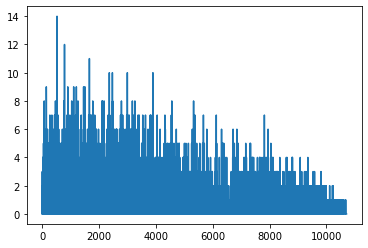

In [17]:
master['TPC Score'].plot()

#### TPC Score per Number of Calls

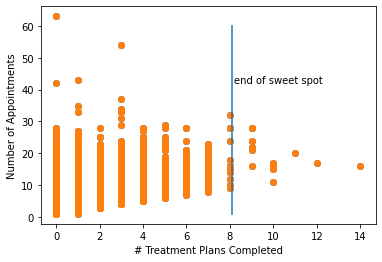

In [44]:
tpc_per_appt = plt.scatter(master['TPC Score'], master["NumOfCalls"], label="# Treatment Plans Completed")
plt.scatter(master['TPC Score'], master["NumOfCalls"], label="# Treatment Plans Completed")
plt.plot([8.1 for x in range(1,61)], [x for x in range(1,61)], label = "end of sweet spot")
plt.text(8.2,42,"end of sweet spot")
plt.plot()
plt.ylabel("Number of Appointments")
plt.xlabel("# Treatment Plans Completed")
# plt.legend()
plt.show()

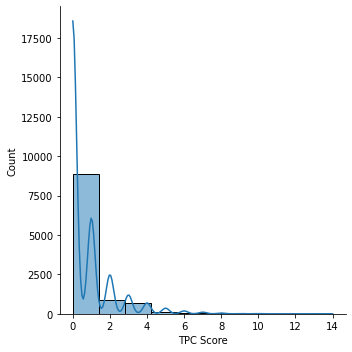

In [29]:
sns.displot(master["TPC Score"], bins=10, kde=True)

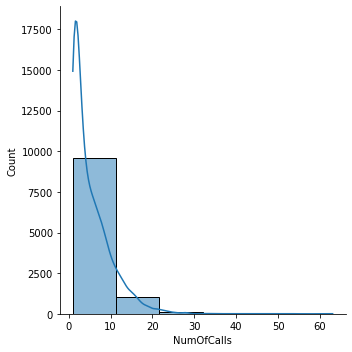

In [31]:
sns.displot(master["NumOfCalls"], bins=6, kde=True)